<a href="https://colab.research.google.com/github/Anokyeken/Anokye-/blob/housing-prices-prediction/Housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Prices - Advanced Regression Techniques**

## House Prices - Advanced Regression Techniques


**Predict sales prices and practice feature engineering, RFs, and gradient boosting**

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


importing the train and test data sets

In [ ]:
test_data_ = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/train.csv')

check the first 20 rows of the test data set

In [ ]:
test_data_.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1461          20       RH         80.0    11622   Pave   NaN      Reg   
1   1462          20       RL         81.0    14267   Pave   NaN      IR1   
2   1463          60       RL         74.0    13830   Pave   NaN      IR1   
3   1464          60       RL         78.0     9978   Pave   NaN      IR1   
4   1465         120       RL         43.0     5005   Pave   NaN      IR1   
5   1466          60       RL         75.0    10000   Pave   NaN      IR1   
6   1467          20       RL          NaN     7980   Pave   NaN      IR1   
7   1468          60       RL         63.0     8402   Pave   NaN      IR1   
8   1469          20       RL         85.0    10176   Pave   NaN      Reg   
9   1470          20       RL         70.0     8400   Pave   NaN      Reg   
10  1471         120       RH         26.0     5858   Pave   NaN      IR1   
11  1472         160       RM         21.0     1680   Pave   NaN      Reg   
12  1473         160       RM         21.0     1680   Pave   NaN      Reg   
13  1474         160       RL         24.0     2280   Pave   NaN      Reg   
14  1475         120       RL         24.0     2280   Pave   NaN      Reg   
15  1476          60       RL        102.0    12858   Pave   NaN      IR1   
16  1477          20       RL         94.0    12883   Pave   NaN      IR1   
17  1478          20       RL         90.0    11520   Pave   NaN      Reg   
18  1479          20       RL         79.0    14122   Pave   NaN      IR1   
19  1480          20       RL        110.0    14300   Pave   NaN      Reg   

   LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0          Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1          Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2          Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3          Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4          HLS    AllPub  ...         144        0    NaN    NaN         NaN   
5          Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
6          Lvl    AllPub  ...           0        0    NaN  GdPrv        Shed   
7          Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
8          Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
9          Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
10         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
11         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
12         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
13         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
14         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
15         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
16         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
17         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
18         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
19         HLS    AllPub  ...           0        0    NaN    NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  
0        0      6    2010        WD         Normal  
1    12500      6    2010        WD         Normal  
2        0      3    2010        WD         Normal  
3        0      6    2010        WD         Normal  
4        0      1    2010        WD         Normal  
5        0      4    2010        WD         Normal  
6      500      3    2010        WD         Normal  
7        0      5    2010        WD         Normal  
8        0      2    2010        WD         Normal  
9        0      4    2010        WD         Normal  
10       0      6    2010        WD         Normal  
11       0      2    2010       COD         Normal  
12       0      3 

check the last 20 rows of the test data set

In [ ]:
test_data_.tail(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1439  2900          80       RL        140.0    11080   Pave   NaN      Reg   
1440  2901          20       RL          NaN    50102   Pave   NaN      IR1   
1441  2902          20       RL          NaN     8098   Pave   NaN      IR1   
1442  2903          20       RL         95.0    13618   Pave   NaN      Reg   
1443  2904          20       RL         88.0    11577   Pave   NaN      Reg   
1444  2905          20      NaN        125.0    31250   Pave   NaN      Reg   
1445  2906          90       RM         78.0     7020   Pave   NaN      Reg   
1446  2907         160       RM         41.0     2665   Pave   NaN      Reg   
1447  2908          20       RL         58.0    10172   Pave   NaN      IR1   
1448  2909          90       RL          NaN    11836   Pave   NaN      IR1   
1449  2910         180       RM         21.0     1470   Pave   NaN      Reg   
1450  2911         160       RM         21.0     1484   Pave   NaN      Reg   
1451  2912          20       RL         80.0    13384   Pave   NaN      Reg   
1452  2913         160       RM         21.0     1533   Pave   NaN      Reg   
1453  2914         160       RM         21.0     1526   Pave   NaN      Reg   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
1439         Lvl    AllPub  ...           0        0    NaN    NaN   
1440         Low    AllPub  ...         138        0    NaN    NaN   
1441         Lvl    AllPub  ...           0        0    NaN    NaN   
1442         Lvl    AllPub  ...           0        0    NaN    NaN   
1443         Lvl    AllPub  ...           0        0    NaN    NaN   
1444         Lvl    AllPub  ...           0        0    NaN    NaN   
1445         Lvl    AllPub  ...           0        0    NaN    NaN   
1446         Lvl    AllPub  ...           0        0    NaN    NaN   
1447         Lvl    AllPub  ...           0        0    NaN    NaN   
1448         Lvl    AllPub  ...           0        0    NaN    NaN   
1449         Lvl    AllPub  ...           0        0    NaN    NaN   
1450         Lvl    AllPub  ...           0        0    NaN    NaN   
1451         Lvl    AllPub  ...           0        0    NaN    NaN   
1452         Lvl    AllPub  ...           0        0    NaN    NaN   
1453         Lvl    AllPub  ...           0        0    NaN  GdPrv   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
1439         NaN       0      5    2006        WD         Normal  
1440         NaN       0      3    2006        WD         Alloca  
1441         NaN       0     10    2006        WD         Normal  
1442         NaN       0     11    2006       New        Partial  
1443         NaN       0      9    2006       New        Partial  
1444         NaN       0      5    2006        WD         Normal  
1445         NaN       0     11    2006        WD         Normal  
1446         NaN       0      5    2006        WD         Normal  
1447         NaN       0     10    2006        WD         Normal  
1448         NaN       0      3    2006        WD         Normal  
1449         NaN       0      4    2006        WD         Normal  
1450         NaN       0      5    2006        WD         Normal  
1451  

check the first 20 rows of the train data set

In [ ]:
data_train.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5          Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7          Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
10         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
11         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
12         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
13         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
14         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
15         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
16         Lvl    AllPub  ...        0    NaN    NaN        Shed     700   
17         Lvl    AllPub  ...        0    NaN    NaN        Shed     500   
18         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
19         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       2   2008        WD         Normal     208500  
1       5   2007        WD         Normal     181500  
2       9   2008        WD         Normal     223500  
3       2   2006        WD        Abnorml     140000  
4      12   2008        WD         Normal     250000  
5      10   2009        WD         Normal     143000  
6       8   2007        WD         Normal     307000  
7      11   2009        WD         Normal     200000  
8       4   2008        WD        Abnorml     129900  
9       1   2008        WD         Normal     118000  
10      2   2008        WD         Normal     129500  
11      7   2006       New        Partial     345000  
12      9   2008        WD         Normal     144000  
13      8   2007       New        Partial     279500  
14    

check the last 20 rows of the train data set

In [ ]:
data_train.tail(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pave   NaN      Reg   
1449  1450         180       RM         21.0     1533   Pave   NaN      Reg   
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1440         Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
1441         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1442         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1443         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1444         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1445         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1446         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1447         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1448         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
1449         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1450         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1451         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1452         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1453         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1440      9   2008        WD         Normal     191000  
1441      5   2008        WD         Normal     149300  
1442      4   2009        WD         Normal     310000  
1443      5   2009        WD         Normal     121000  
1444     11   2007        WD         Normal     179600  
1445      5   2007        WD         Normal     129000  
1446      4   2010        WD         Normal     157900  
1447     12   2007        WD         Normal     240000  
1448      5   2007        WD         Normal     112000  
1449      8   2006        WD        Abnorml      92000  
1450      9   2009        WD         Normal     136000  
1451      5   2009       

check the information about the test and train data set

In [ ]:
test_data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# The description of information for each column of the test and train data set:
# count - The number of not-empty values.
# mean - The average (mean) value.
# std - The standard deviation.
# min - the minimum value.
# 25% - The 25% percentile*.
# 50% - The 50% percentile*.
# 75% - The 75% percentile*.
# max - the maximum value.

In [ ]:
test_data_.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [ ]:
data_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# Data Preprocessing

# check for null values in the train and test data

In [ ]:
test_data_.isnull().any()

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType          True
SaleCondition    False
Length: 80, dtype: bool

In [ ]:
data_train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [ ]:
test_data_.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
data_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# check for duplicate in the train and test data

In [ ]:
test_data_.index.is_unique

True

In [ ]:
data_train.columns.is_unique

True

# Dropping the ID column in the train data set because the index is serving the same purpose

In [ ]:
data_train.drop('Id', axis=1, inplace=True)

In [ ]:
data_train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

# Dropping the ID column in the train data set because the index is serving the same purpose

In [ ]:
test_data_.drop('Id', axis=1, inplace=True )

In [ ]:
test_data_

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             20       RH         80.0    11622   Pave   NaN      Reg   
1             20       RL         81.0    14267   Pave   NaN      IR1   
2             60       RL         74.0    13830   Pave   NaN      IR1   
3             60       RL         78.0     9978   Pave   NaN      IR1   
4            120       RL         43.0     5005   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
2            Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
4            HLS    AllPub    Inside  ...         144        0    NaN    NaN   
...          ...       ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1455         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1456         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1457         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0       6    2010        WD         Normal  
1           Gar2   12500       6    2010        WD         Normal  
2            NaN       0       3    2010        WD         Normal  
3            NaN       0       6    2010        WD         Normal  
4            NaN       0       1    2010        WD         Normal  
...          ...     ...     ...     ...       ...            ...  
1454         NaN       0       6    2006        WD         Normal  
1455         NaN       0       4    2006        WD        Abnorml  
1456         NaN       0       9    2006        WD        Abnorml  
1457        Shed     700       7    2006        WD         Normal  
1458         NaN       0      11    2006        WD         Normal  

[1459 rows x 79 columns]

# Check the dependent feature sale price with on the train data set

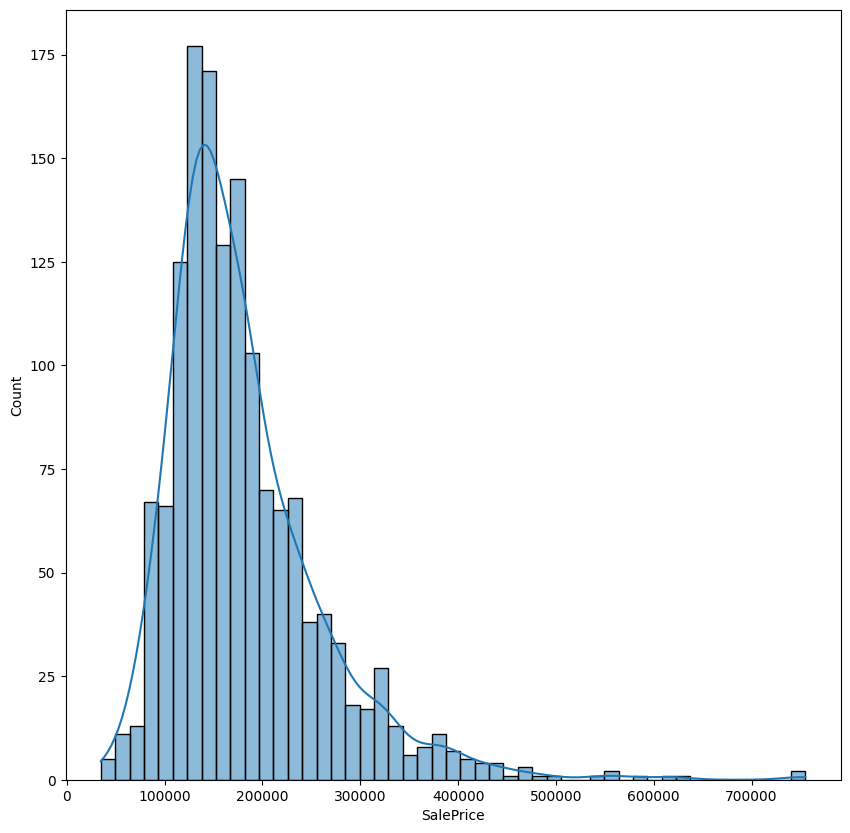

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='SalePrice', data=data_train, kde=True)
plt.show()

# Visualization of the distribution for all the numerical features on the train.

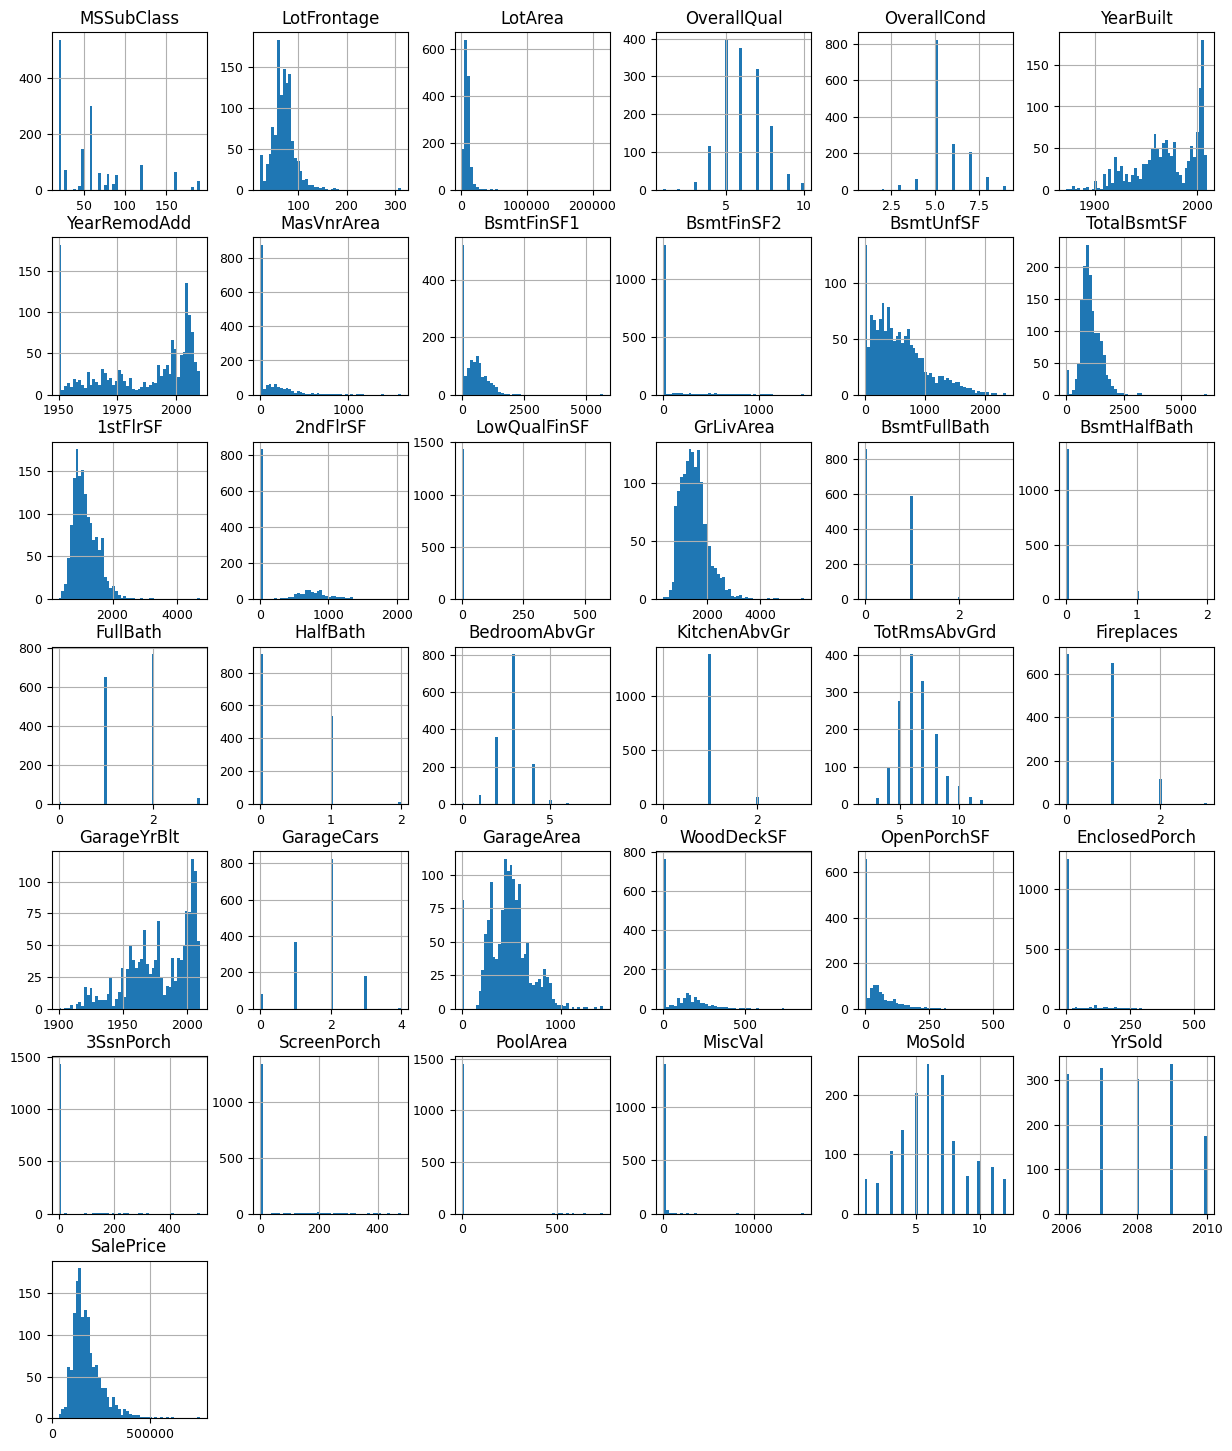

In [ ]:
data_train.hist(figsize=(15, 18), bins=50, xlabelsize=9, ylabelsize=9);

#  check the correlation on the train data to find the extent that two variables are linearly related to each other

<ipython-input-24-87aaa6e35c28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr(), annot=True, fmt=".1f", linewidth=.5)


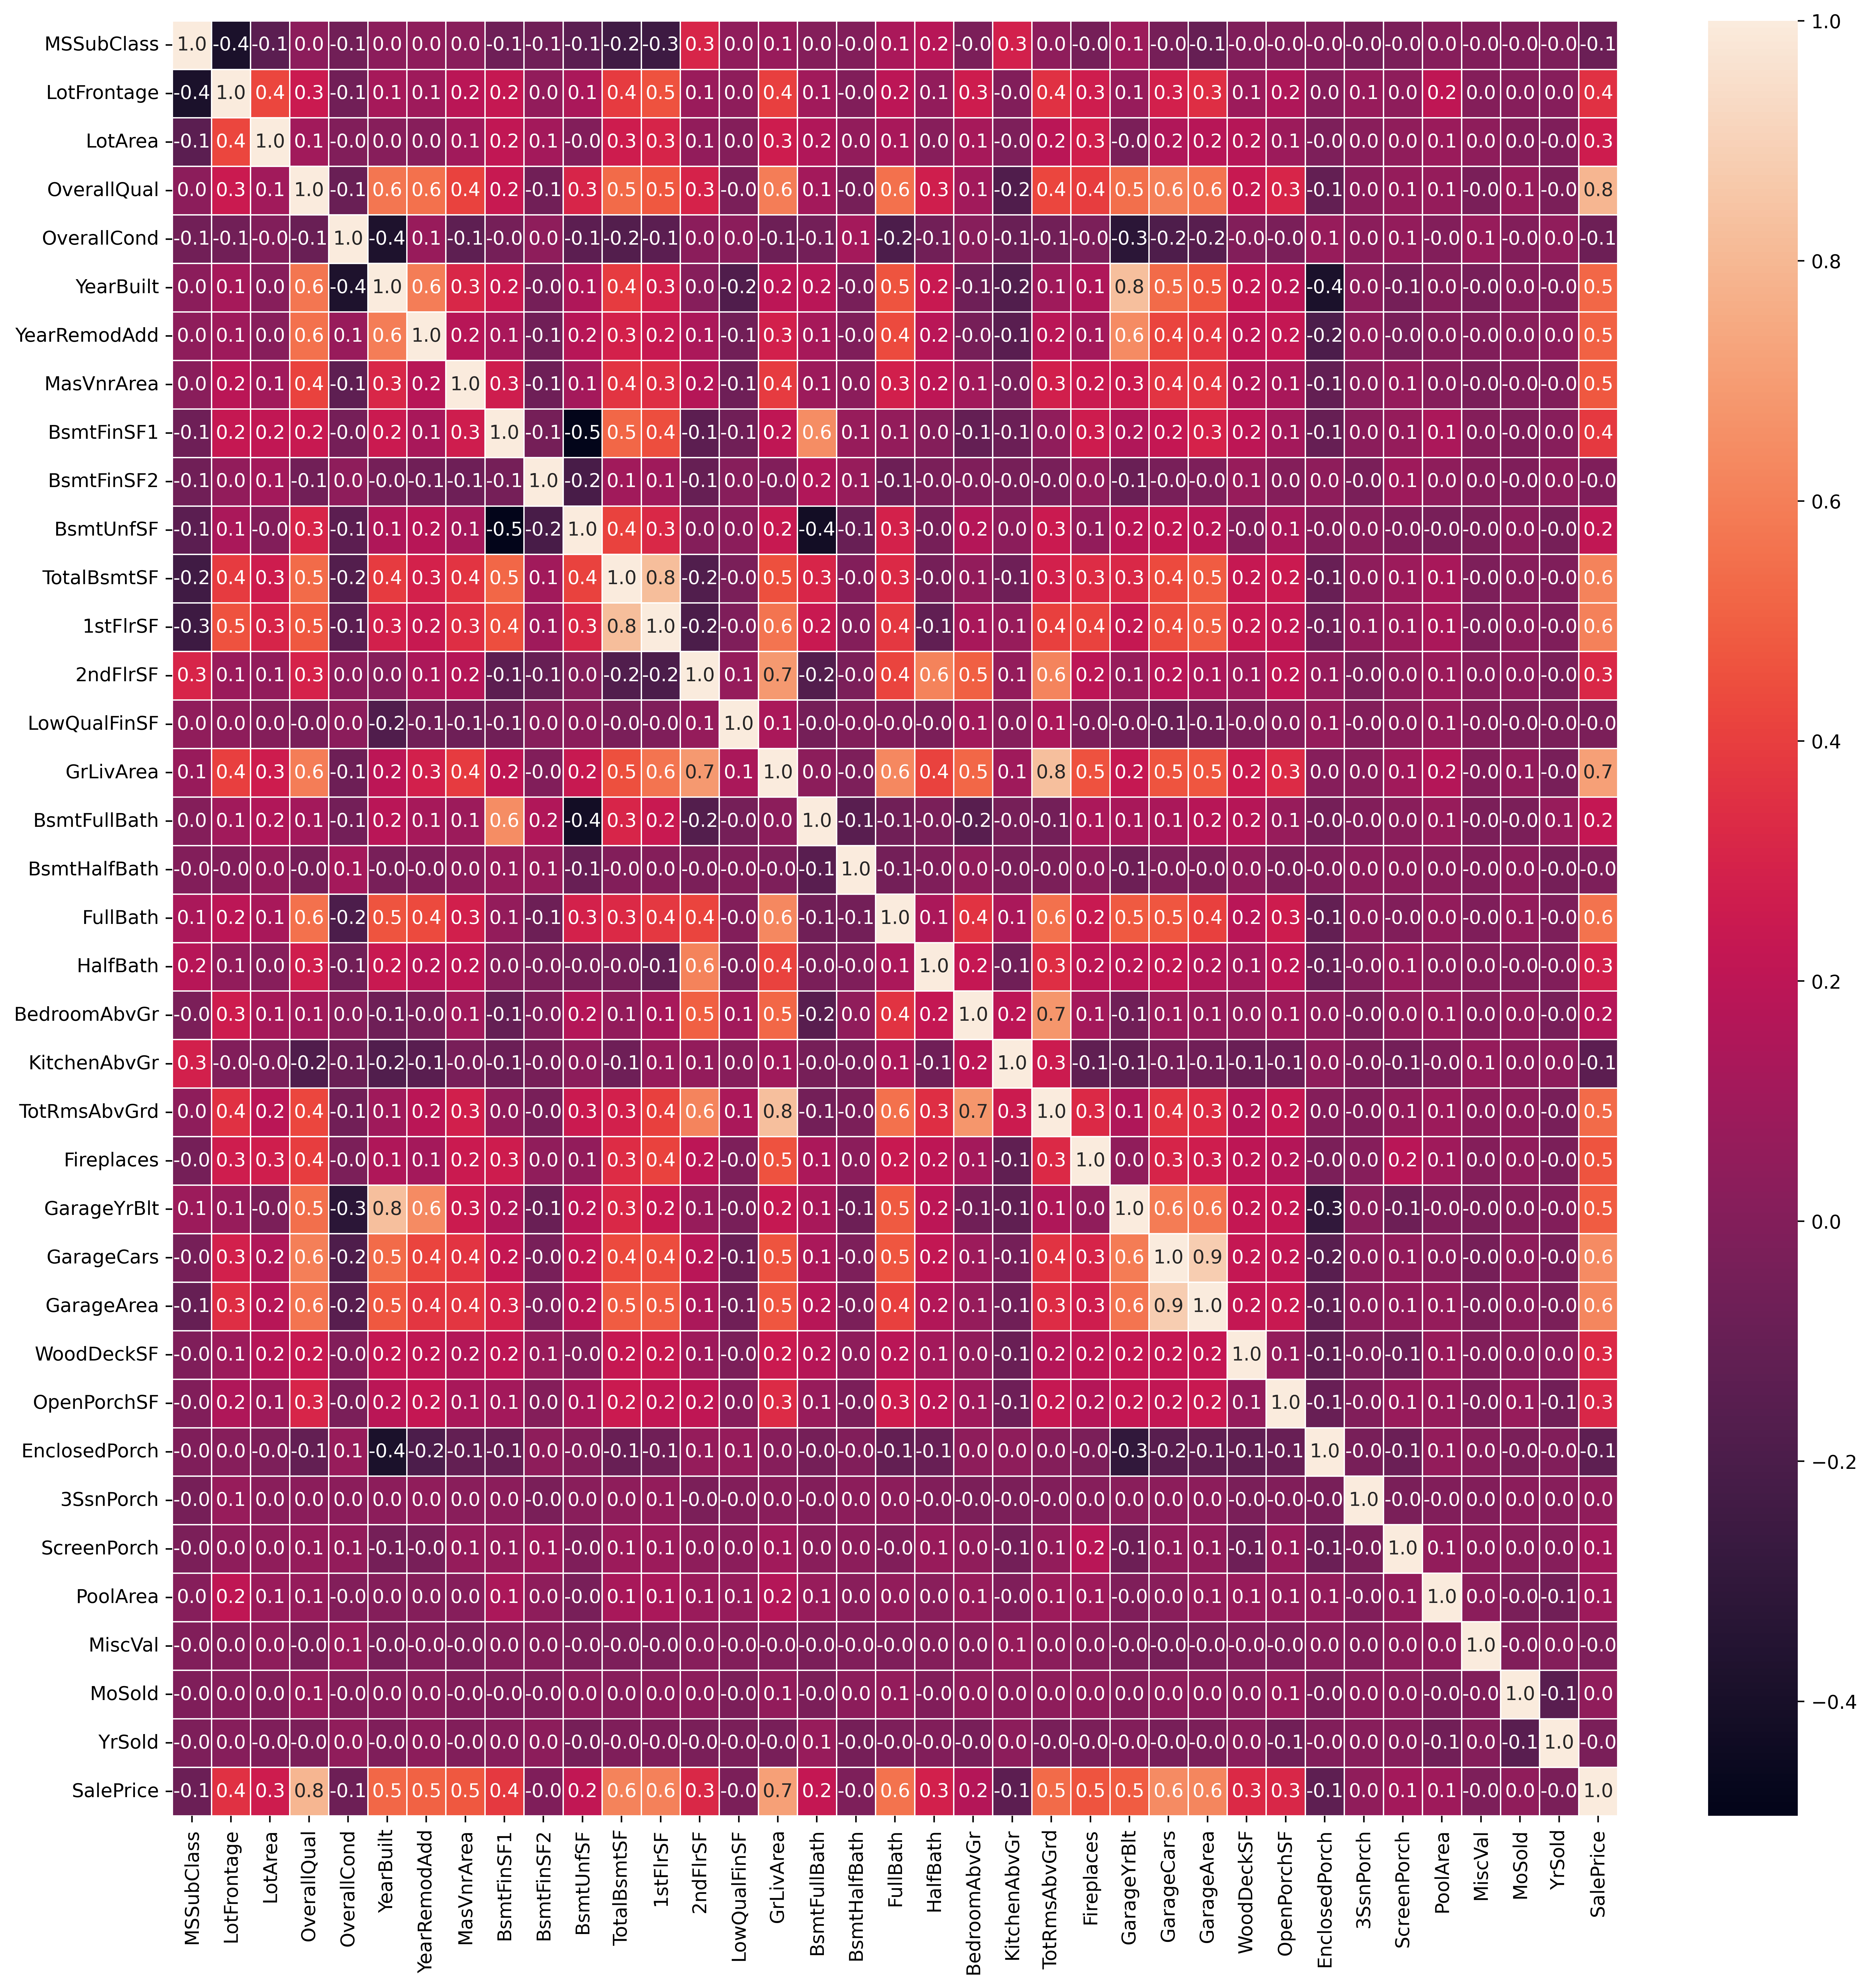

In [ ]:
plt.figure(figsize=(17,17), dpi =500)
sns.heatmap(data_train.corr(), annot=True, fmt=".1f", linewidth=.5)
plt.show()

# Categorial Features Analysis on the train data set

In [ ]:
features_cat = np.array([n for n in data_train.columns.tolist() if data_train[n].dtype == 'object'])
features_cont = np.array([n for n in data_train.columns.tolist() if data_train[n].dtype != 'object'])

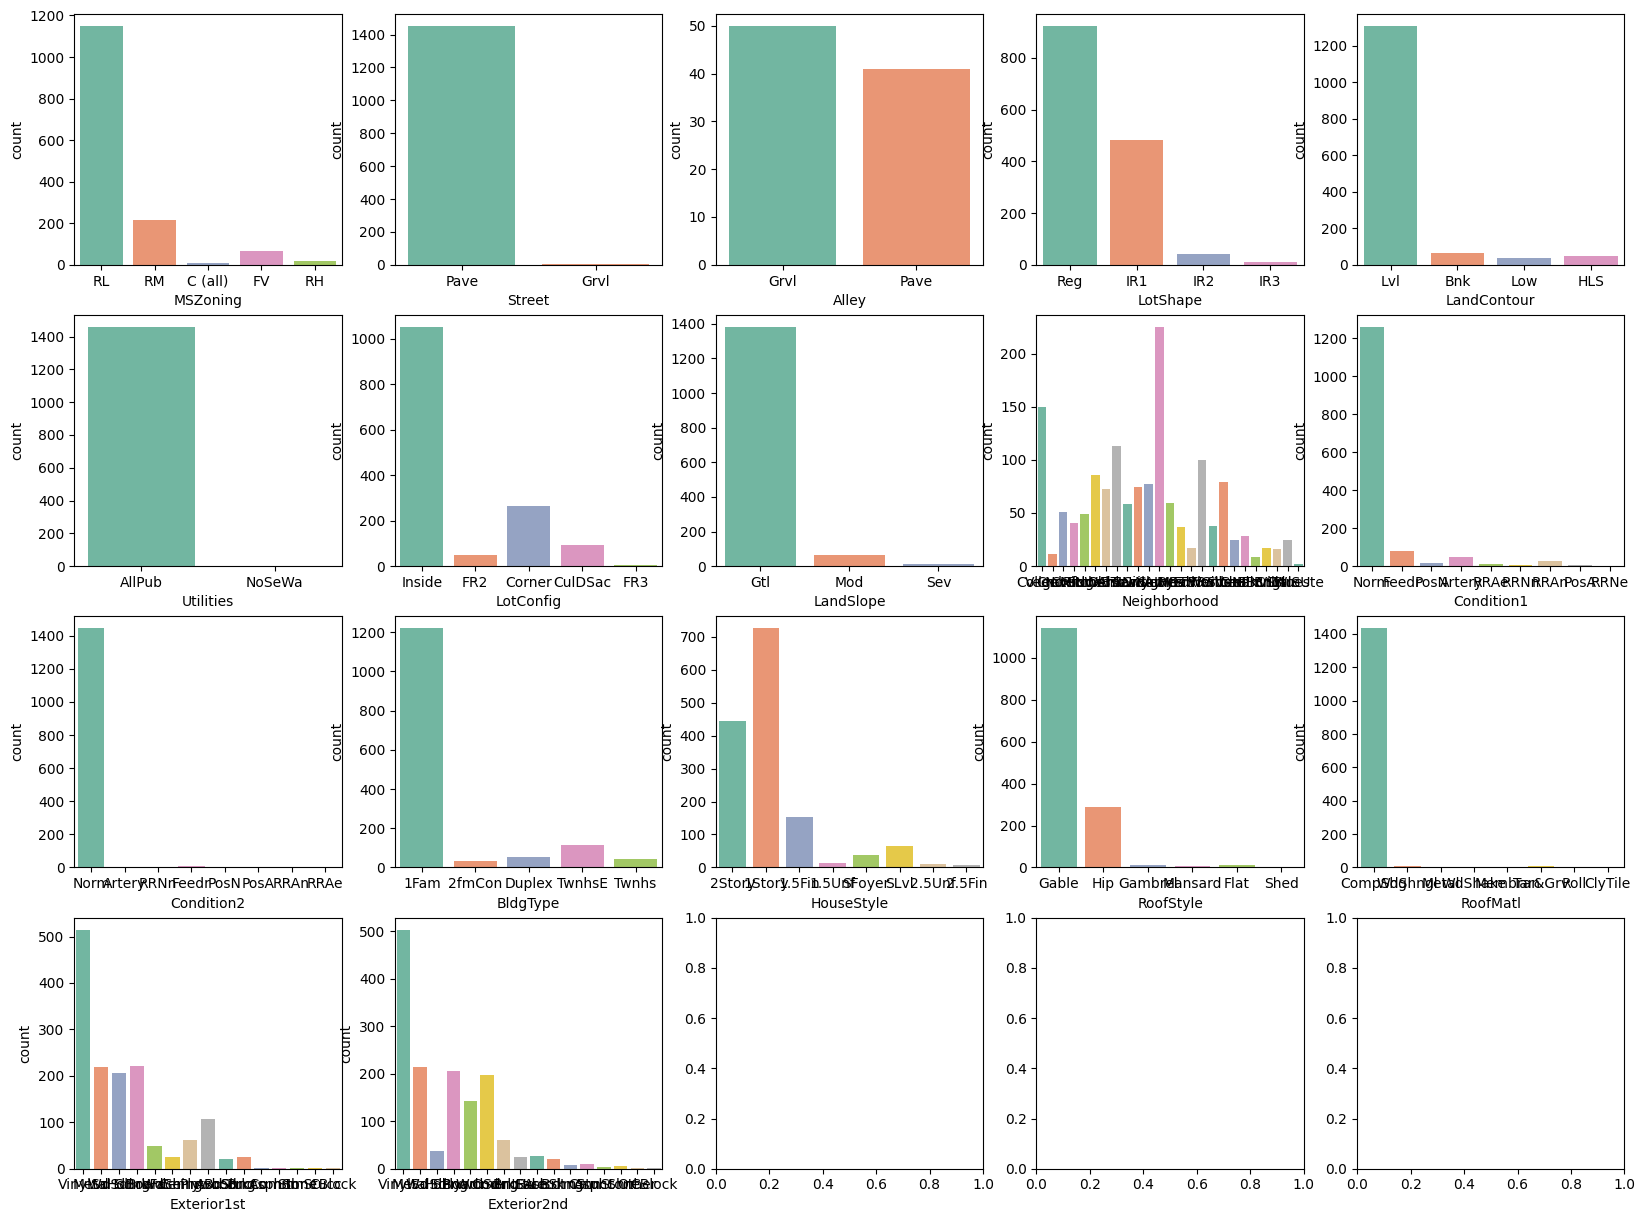

In [ ]:
f,ax = plt.subplots(4,5, figsize=(20,15))
m=0
for i in range(9):
    for j in range(5):
        if m<17:
            sns.countplot(x=features_cat[m], data=data_train, ax=ax[i][j], palette='Set2')
            m=m+1

# Drop the features that are not making much significance

In [ ]:
data_train.drop(['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical',
                'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2',
                'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street'], axis=1, inplace=True)

In [ ]:
test_data_.drop(['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical',
                'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2',
                'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street'], axis=1, inplace=True)

# Upating the features

In [ ]:
features_cat = np.array([n for n in data_train.columns.tolist() if data_train[n].dtype == 'object'])
features_cont = np.array([n for n in data_train.columns.tolist() if data_train[n].dtype != 'object'])

# Compare the Categorial Features vs SalePrice

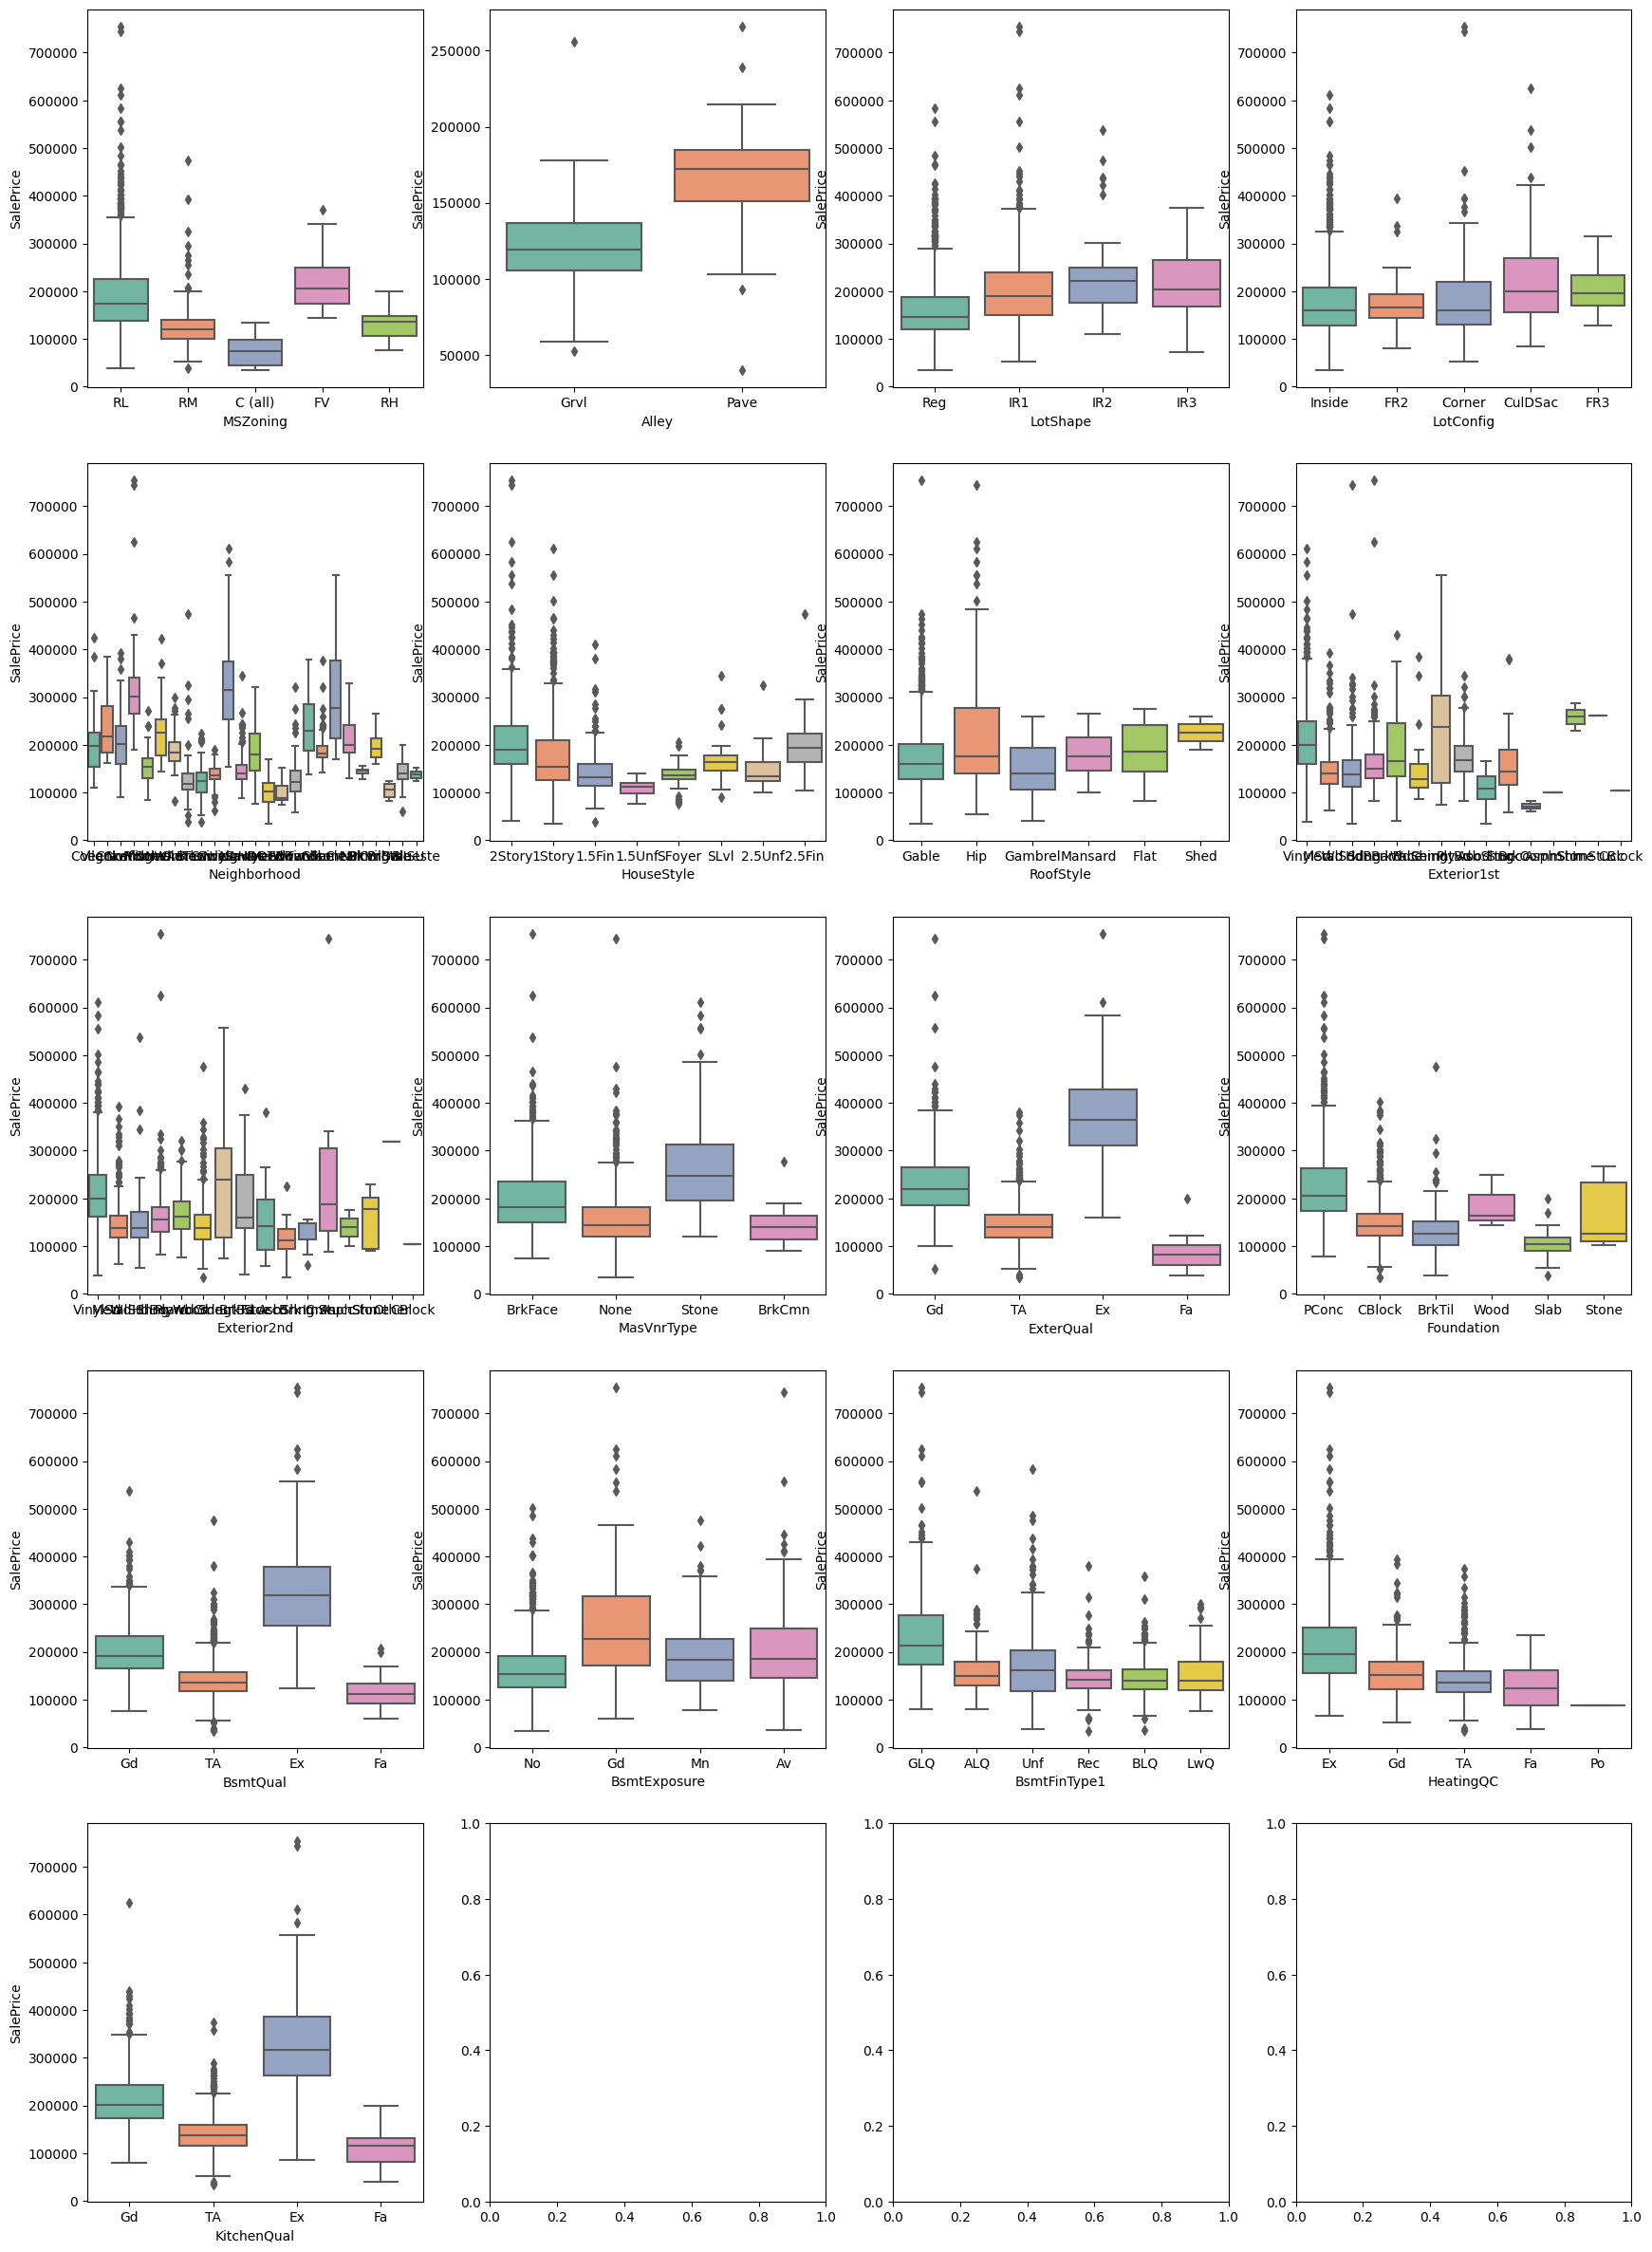

In [ ]:
f,ax = plt.subplots(5,4, figsize=(21,30))
m=0
for q in range(8):
    for r in range(4):
        if m<17:
            sns.boxplot(x=features_cat[m], y='SalePrice', data=data_train, ax=ax[q][r], palette='Set2')
            m=m+1

# Continuous Features Analysis on the train and test data set

The Blue Bars represents the Training Data and Red Steps represents the Test data.

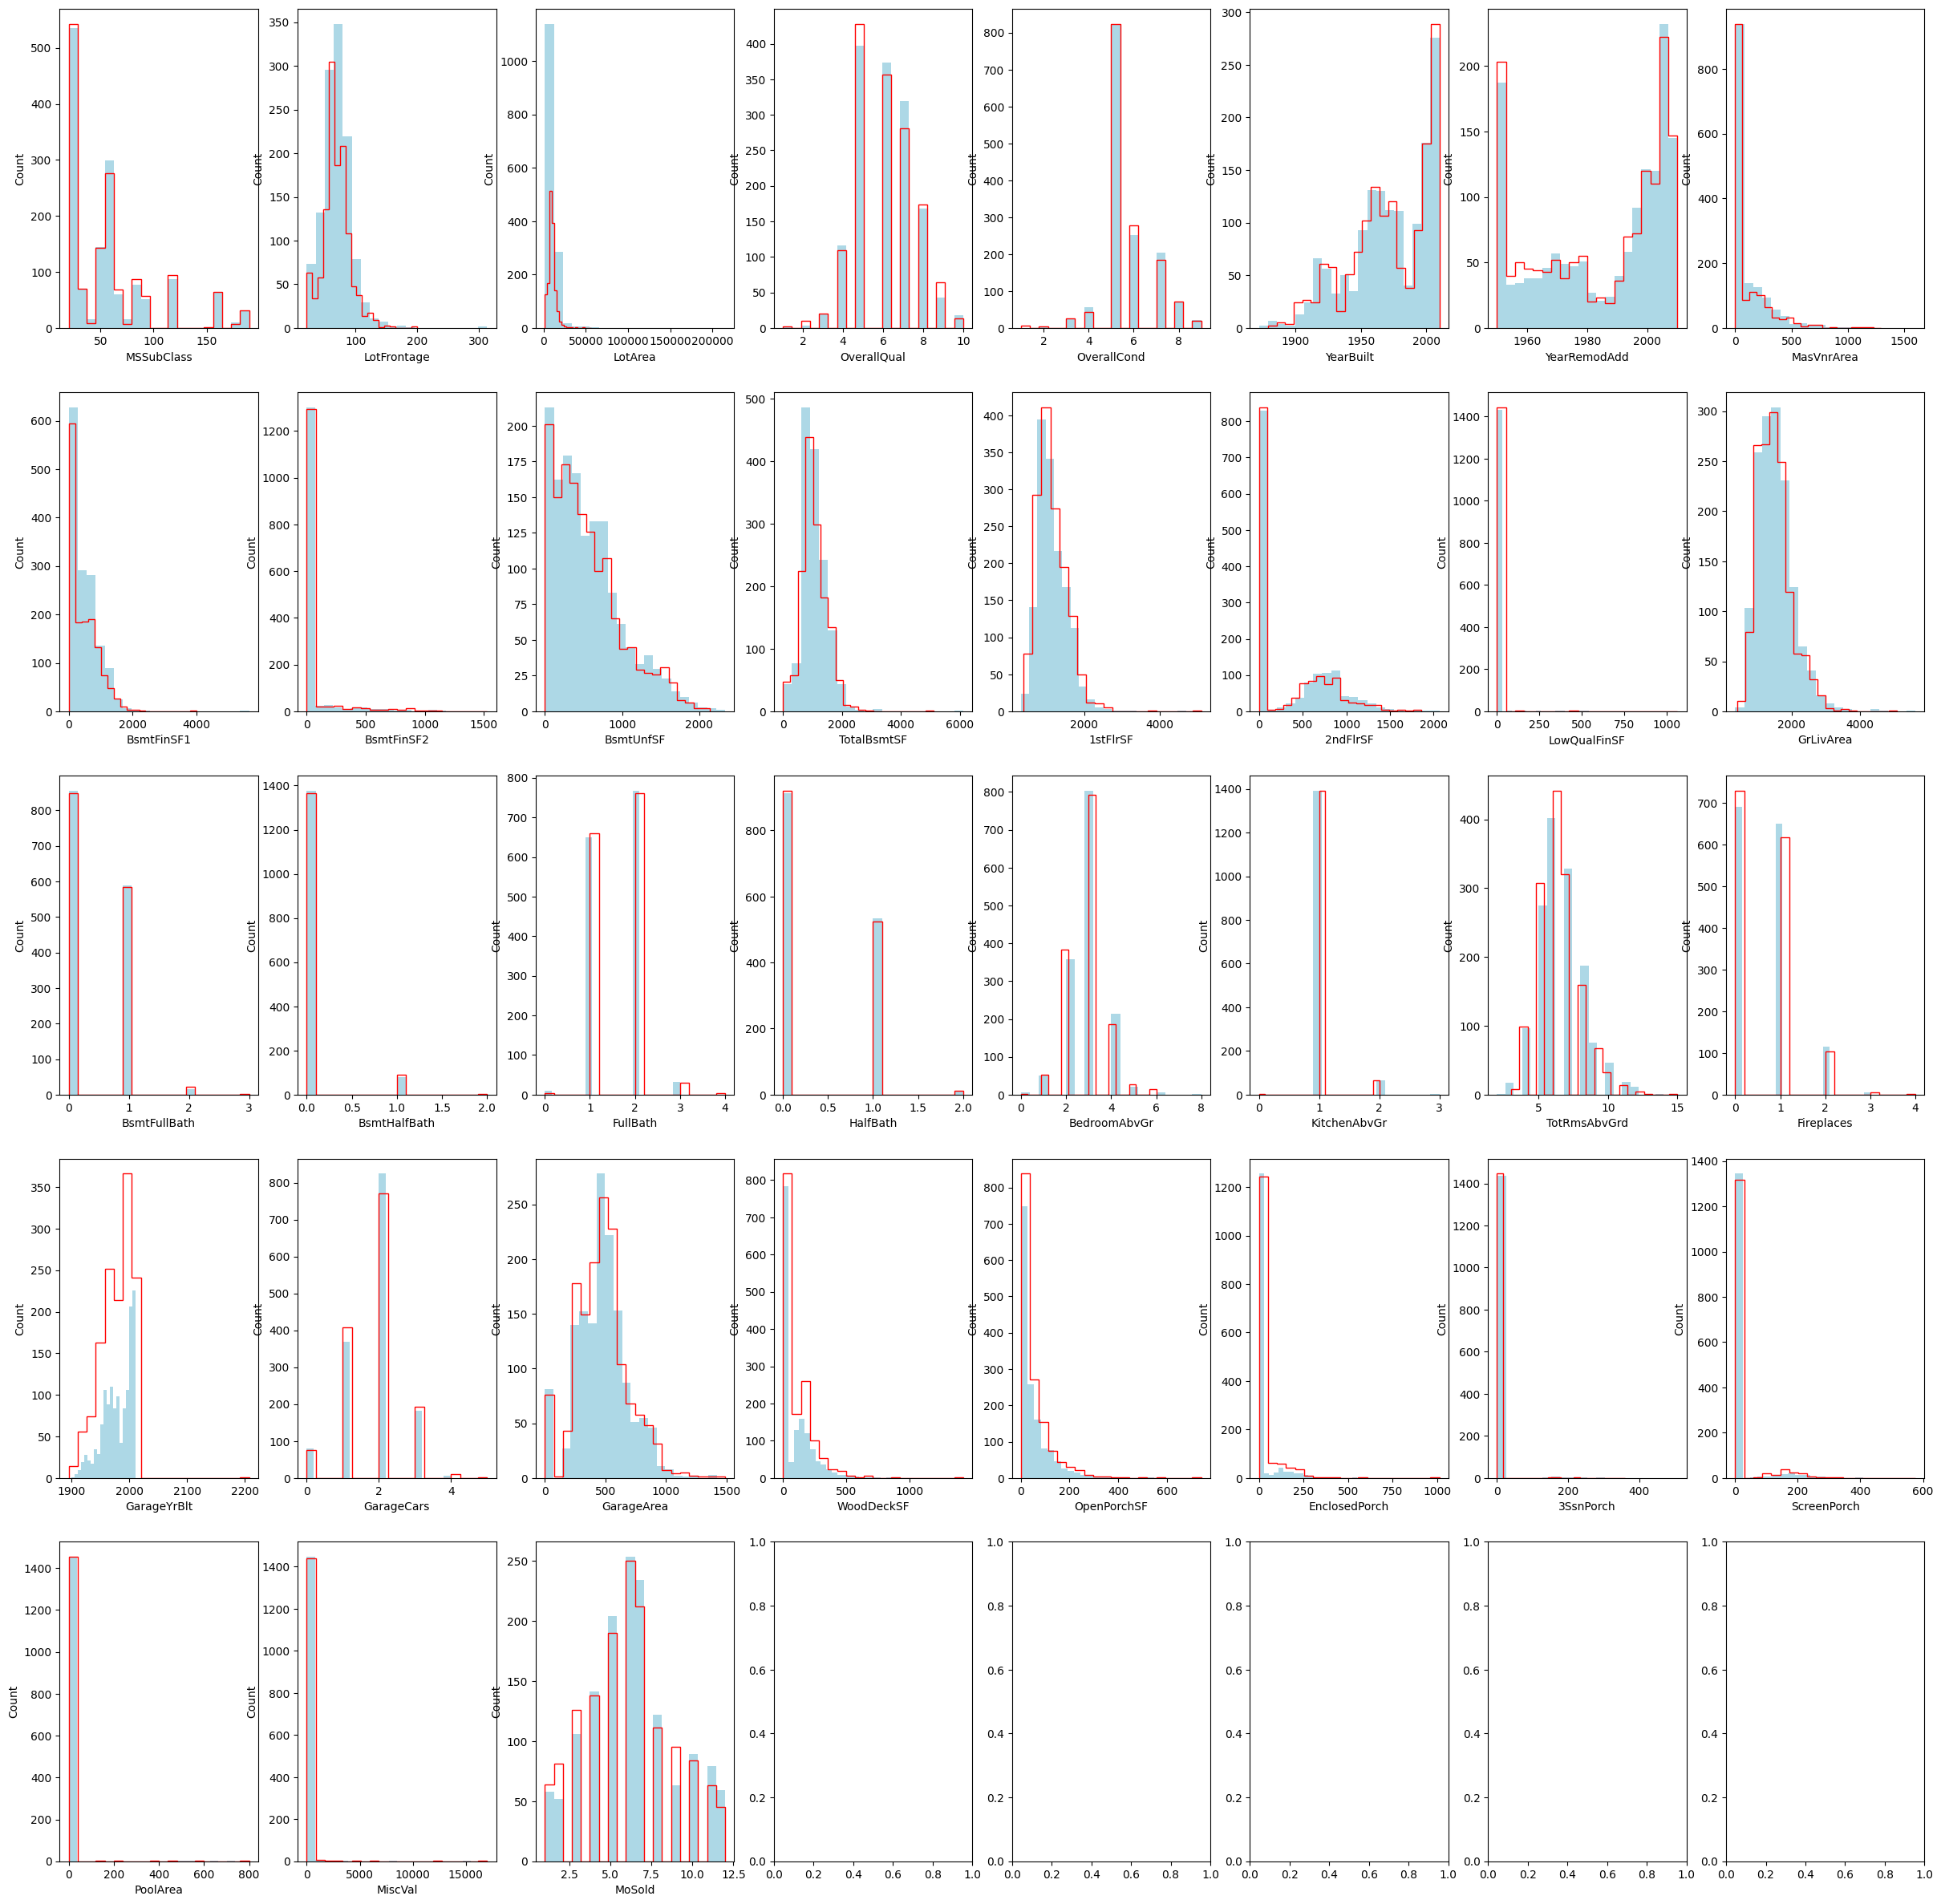

In [ ]:
f,ax = plt.subplots(5,8, figsize=(30,30))
m=0
for i in range(8):
    for j in range(8):
        if m<35:
            ax[i][j].hist(data_train[features_cont[m]], bins=20, histtype='bar', color='LightBlue')
            ax[i][j].hist(test_data_[features_cont[m]], bins=20, histtype='step', color='Red')
            ax[i][j].set_xlabel(features_cont[m])
            ax[i][j].set_ylabel('Count')
            m=m+1

plt.show()

# Drop the features that are not making much significance

In [ ]:
data_train.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch',
                'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath','LowQualFinSF',
                'BsmtFinSF2', 'MasVnrArea', 'BsmtFinSF1'], axis=1, inplace=True)

In [ ]:
test_data_.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch',
                'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath','LowQualFinSF',
                'BsmtFinSF2', 'MasVnrArea', 'BsmtFinSF1'], axis=1, inplace=True)

# Upating the features

In [ ]:
features_cat = np.array([n for n in data_train.columns.tolist() if data_train[n].dtype == 'object'])
features_cont = np.array([n for n in data_train.columns.tolist() if data_train[n].dtype != 'object'])

# Compare the Continuous Features vs SalePrice

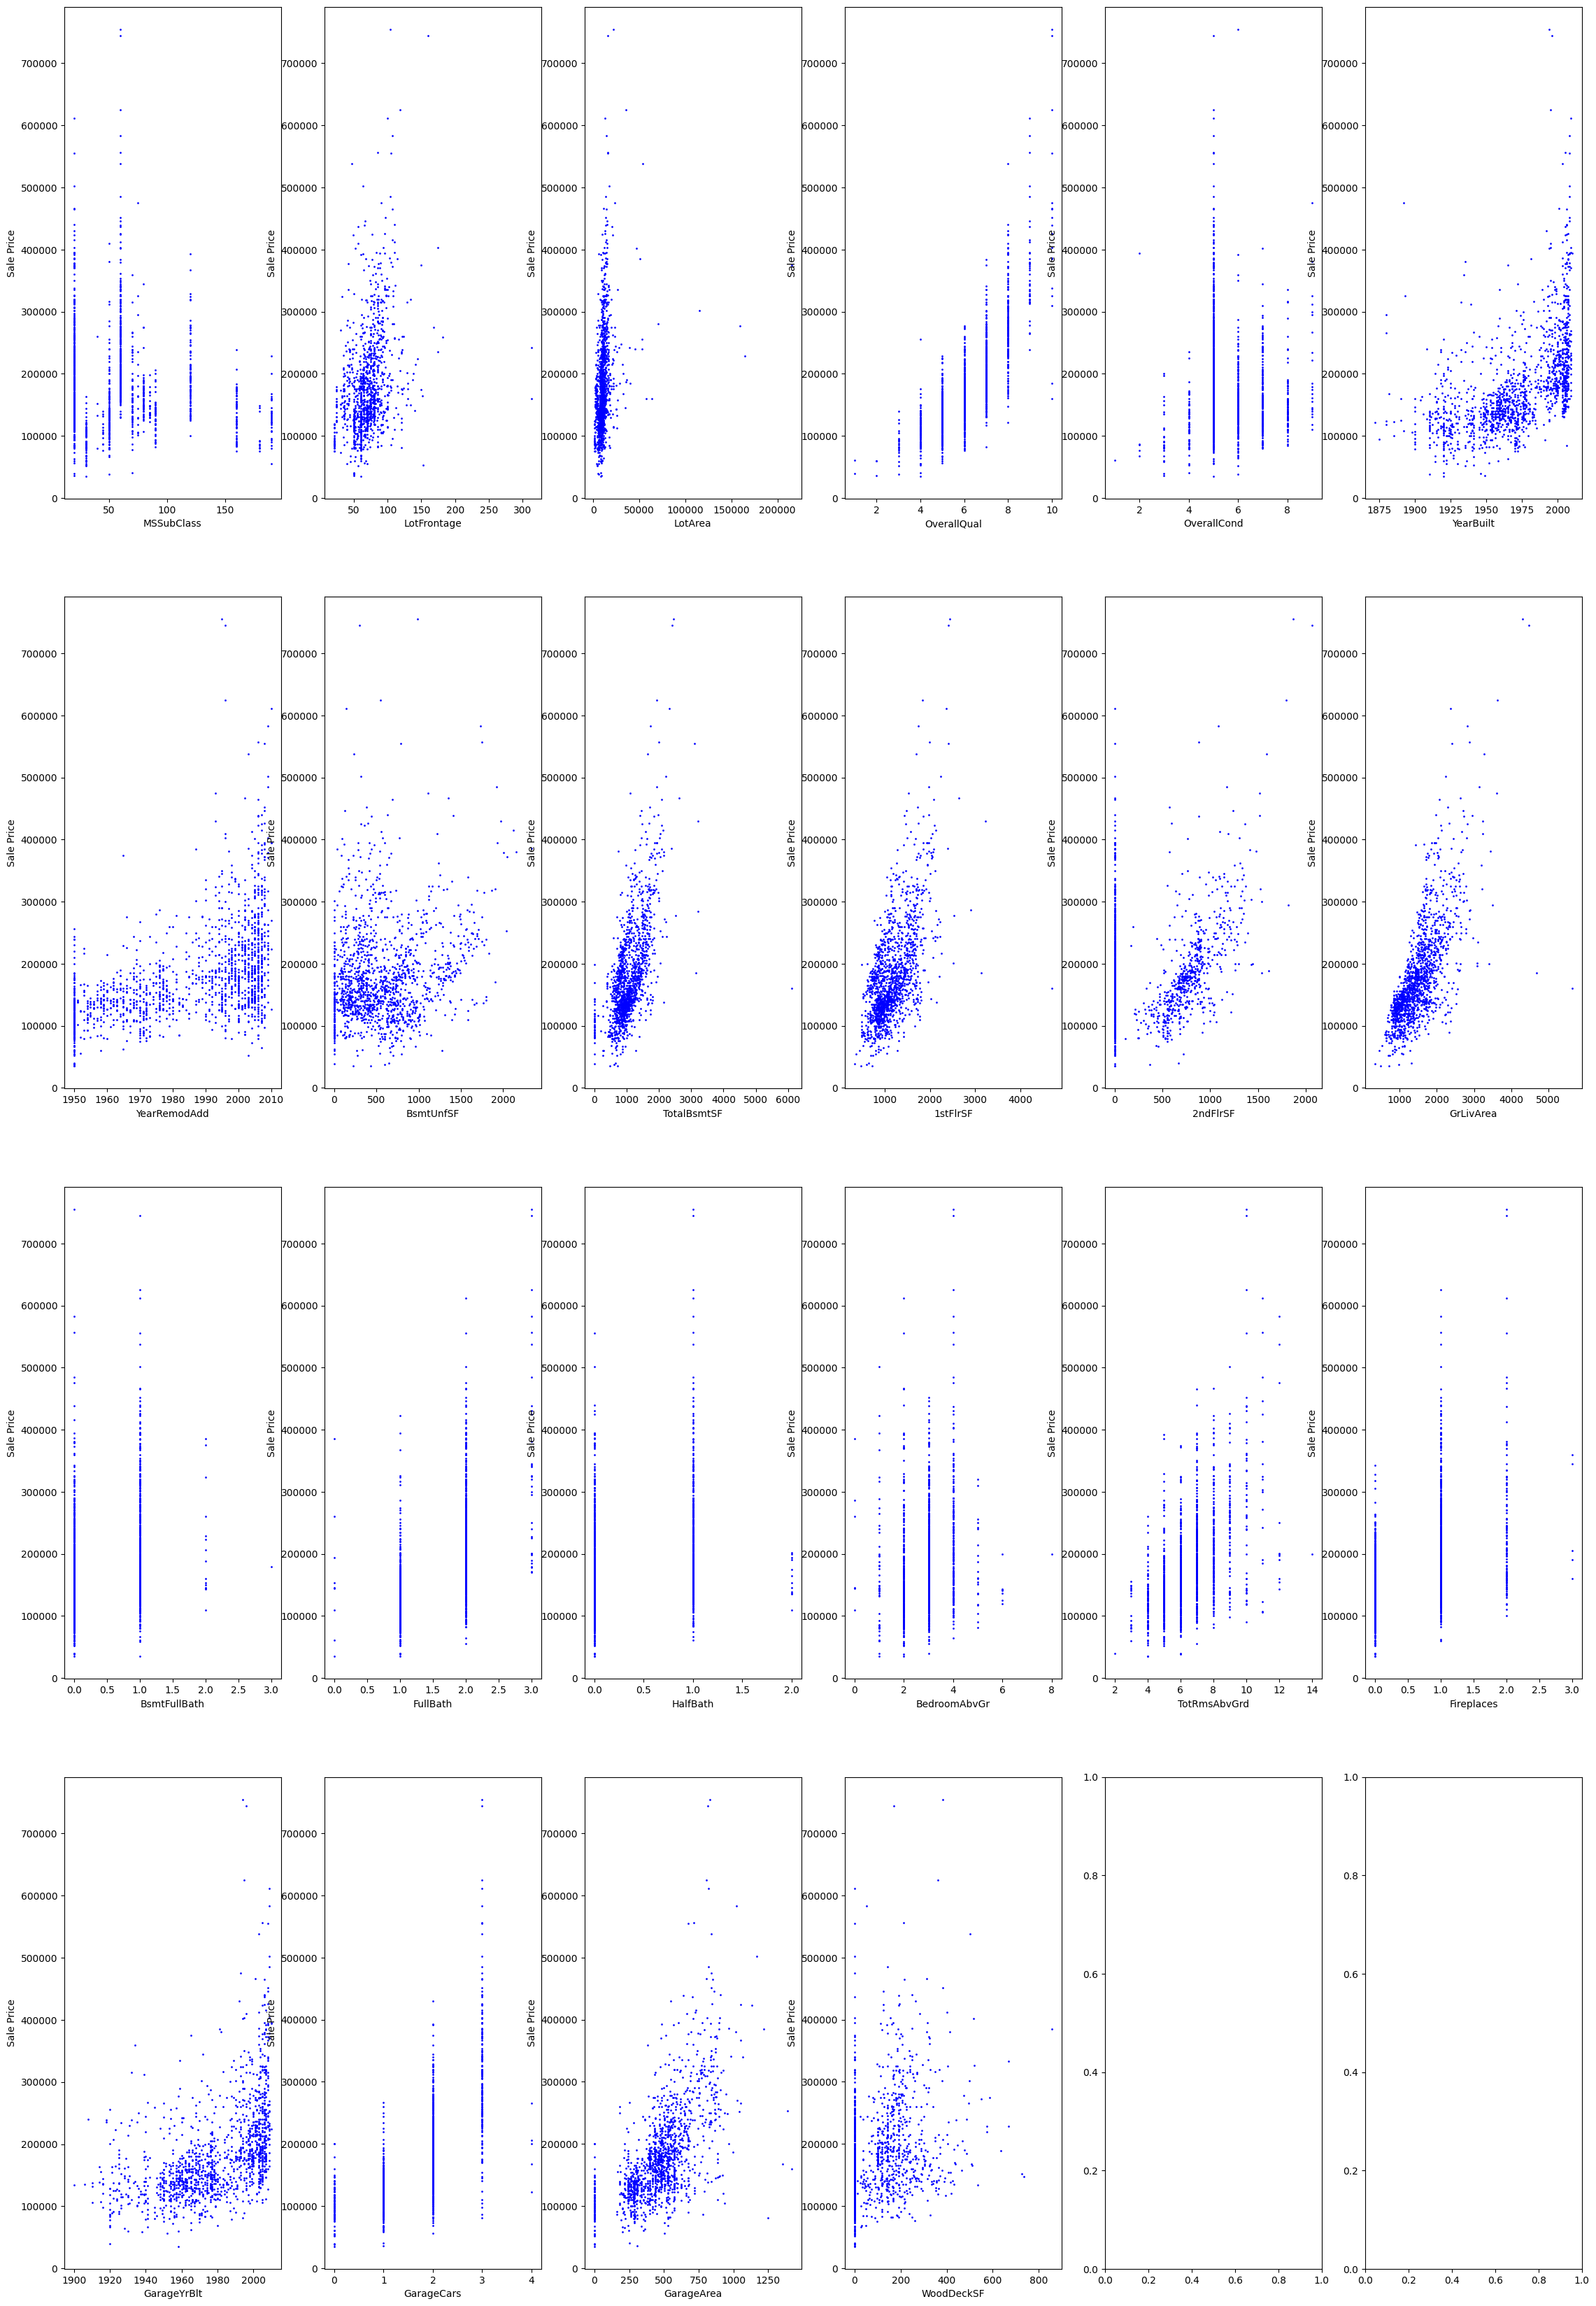

In [ ]:
f,ax = plt.subplots(4,6, figsize=(28,42))
m=0
for i in range(8):
    for j in range(6):
        if m<22:
            ax[i][j].scatter(x=features_cont[m], y='SalePrice', data=data_train, s=1, c='blue')
            ax[i][j].set_xlabel(features_cont[m])
            ax[i][j].set_ylabel('Sale Price')
            m=m+1
plt.show()

# Building Machine learninng model

In [ ]:
data_train.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SalePrice'], dtype=object)

In [ ]:
data_train['SalePrice'].median()

163000.0

# create target

In [ ]:
target = np.where(data_train['SalePrice'] > data_train['SalePrice'].median())

In [ ]:
target

(array([   0,    1,    2,    4,    6,    7,   11,   13,   20,   22,   25,
          27,   28,   32,   33,   34,   35,   41,   45,   46,   47,   50,
          53,   55,   56,   57,   58,   62,   64,   65,   66,   67,   69,
          70,   72,   80,   82,   84,   85,   86,   87,   92,   94,   95,
          96,  100,  101,  103,  104,  105,  109,  111,  112,  113,  114,
         115,  118,  119,  120,  124,  130,  131,  133,  134,  135,  137,
         138,  139,  141,  142,  143,  147,  151,  152,  153,  157,  158,
         159,  161,  162,  166,  167,  168,  169,  171,  172,  174,  175,
         176,  177,  178,  180,  181,  183,  185,  186,  189,  190,  191,
         192,  196,  197,  199,  201,  205,  208,  211,  212,  216,  218,
         219,  220,  221,  222,  224,  226,  229,  231,  234,  236,  237,
         238,  240,  244,  245,  248,  249,  251,  252,  255,  256,  257,
         258,  260,  261,  265,  266,  267,  270,  271,  272,  275,  276,
         278,  279,  280,  281,  282, 

In [ ]:
#target.sum()/target.shape[0]

# add target to the dataFrame

In [ ]:
#data_train['Excessively Sale Price'] = target

In [ ]:
data_train.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LotConfig  \
0          60       RL         65.0     8450   NaN      Reg    Inside   
1          20       RL         80.0     9600   NaN      Reg       FR2   
2          60       RL         68.0    11250   NaN      IR1    Inside   
3          70       RL         60.0     9550   NaN      IR1    Corner   
4          60       RL         84.0    14260   NaN      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  GarageCars  GarageArea  \
0      CollgCr     2Story            7  ...           2         548   
1      Veenker     1Story            6  ...           2         460   
2      CollgCr     2Story            7  ...           2         608   
3      Crawfor     2Story            7  ...           3         642   
4      NoRidge     2Story            8  ...           3         836   

   WoodDeckSF OpenPorchSF PoolQC Fence MiscFeature MoSold YrSold SalePrice  
0           0          61    NaN   NaN         NaN      2   2008    208500  
1         298           0    NaN   NaN         NaN      5   2007    181500  
2           0          42    NaN   NaN         NaN      9   2008    223500  
3           0          35    NaN   NaN         NaN      2   2006    140000  
4         192          84    NaN   NaN         NaN     12   2008    250000  

[5 rows x 49 columns]

# drop the sale price


In [ ]:
#ata_train_target = data_train.drop(['Excessively Sale Price'], axis = 1)

In [ ]:
#data_train_target.head(5)

# select the input for the models

In [ ]:
#data_train_target.shape

In [ ]:
data_train.iloc[:,:-1]

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LotConfig  \
0             60       RL         65.0     8450   NaN      Reg    Inside   
1             20       RL         80.0     9600   NaN      Reg       FR2   
2             60       RL         68.0    11250   NaN      IR1    Inside   
3             70       RL         60.0     9550   NaN      IR1    Corner   
4             60       RL         84.0    14260   NaN      IR1       FR2   
...          ...      ...          ...      ...   ...      ...       ...   
1455          60       RL         62.0     7917   NaN      Reg    Inside   
1456          20       RL         85.0    13175   NaN      Reg    Inside   
1457          70       RL         66.0     9042   NaN      Reg    Inside   
1458          20       RL         68.0     9717   NaN      Reg    Inside   
1459          20       RL         75.0     9937   NaN      Reg    Inside   

     Neighborhood HouseStyle  OverallQual  ...  GarageFinish  GarageCars  \
0         CollgCr     2Story            7  ...           RFn           2   
1         Veenker     1Story            6  ...           RFn           2   
2         CollgCr     2Story            7  ...           RFn           2   
3         Crawfor     2Story            7  ...           Unf           3   
4         NoRidge     2Story            8  ...           RFn           3   
...           ...        ...          ...  ...           ...         ...   
1455      Gilbert     2Story            6  ...           RFn           2   
1456       NWAmes     1Story            6  ...           Unf           2   
1457      Crawfor     2Story            7  ...           RFn           1   
1458        NAmes     1Story            5  ...           Unf           1   
1459      Edwards     1Story            5  ...           Fin           1   

      GarageArea WoodDeckSF OpenPorchSF PoolQC  Fence MiscFeature MoSold  \
0            548          0          61    NaN    NaN         NaN      2   
1            460        298           0    NaN    NaN         NaN      5   
2            608          0          42    NaN    NaN         NaN      9   
3            642          0          35    NaN    NaN         NaN      2   
4            836        192          84    NaN    NaN         NaN     12   
...          ...        ...         ...    ...    ...         ...    ...   
1455         460          0          40    NaN    NaN         NaN      8   
1456         500        349           0    NaN  MnPrv         NaN      2   
1457         252          0          60    NaN  GdPrv        Shed      5   
1458         240        366           0    NaN    NaN         NaN      4   
1459         276        736          68    NaN    NaN         NaN      6   

     YrSold  
0      2008  
1      2007  
2      2008  
3      2006  
4      2008  
...     ...  
1455   2007  
1456   2010  
1457   2010  
1458   2010  
1459   2008  

[1460 rows x 48 columns]

In [ ]:
features_cat1 = np.array([n for n in data_train.columns.tolist() if data_train[n].dtype == 'object'])
features_cont1 = np.array([n for n in data_train.columns.tolist() if data_train[n].dtype != 'object'])

In [ ]:
#data_train = data_train.drop(['MSZoning'], axis = 1)

In [ ]:
x = data_train.iloc[:,:-1]
y = data_train['SalePrice']

In [ ]:
# Encode Categorial Data
from sklearn.preprocessing import LabelEncoder
for i in features_cat1:
    # Training Data
    enco = LabelEncoder()
    x[i] =enco.fit_transform(x[i])
    # Test Data
    enco1 = LabelEncoder()
    test_data_[i] =enco1.fit_transform(test_data_[i])

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
x = imputer.fit_transform(x)


In [ ]:
x

array([[6.000e+01, 3.000e+00, 6.500e+01, ..., 4.000e+00, 2.000e+00,
        2.008e+03],
       [2.000e+01, 3.000e+00, 8.000e+01, ..., 4.000e+00, 5.000e+00,
        2.007e+03],
       [6.000e+01, 3.000e+00, 6.800e+01, ..., 4.000e+00, 9.000e+00,
        2.008e+03],
       ...,
       [7.000e+01, 3.000e+00, 6.600e+01, ..., 2.000e+00, 5.000e+00,
        2.010e+03],
       [2.000e+01, 3.000e+00, 6.800e+01, ..., 4.000e+00, 4.000e+00,
        2.010e+03],
       [2.000e+01, 3.000e+00, 7.500e+01, ..., 4.000e+00, 6.000e+00,
        2.008e+03]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 20 )

In [ ]:
print(x_train.shape, y_train.shape)

(1168, 48) (1168,)


In [ ]:
print(x_test.shape, y_test.shape)

(292, 48) (292,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

## Linear Regression and Random Forest

In [ ]:
model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [150, 200, 300],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    lrf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    lrf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': lrf.best_score_,
        'best_params': lrf.best_params_
    })

In [ ]:

b_scores = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
b_scores

model  best_score  \
0  linear_regression    0.788602   
1      random_forest    0.845193   

                                         best_params  
0                                                 {}  
1  {'max_depth': None, 'min_samples_split': 5, 'n...

In [ ]:
model = RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=150)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8836141931452562

In [ ]:
test_data_ = imputer.transform(test_data_)

In [ ]:

pred = model.predict(test_data_)

## Submission

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
sub.SalePrice =pred
sub.to_csv('sample_submission.csv', index = False)